In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
churn_df = pd.read_csv('Churn_Modelling_12.csv')

In [3]:
churn_df.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,Marital Status,Income,Education Level,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,28634602,619.0,Perth,Female,42.0,2,0.00,Divorced,84256.33,High School,1.0,1.0,1.0,101348.88,1
1,2,28647311,608.0,Melborne,Female,41.0,1,83807.86,Married,18835.46,Diploma,1.0,0.0,1.0,112542.58,0
2,3,28619304,502.0,Perth,Female,42.0,8,159660.80,Single,49099.61,Diploma,3.0,1.0,0.0,113931.57,1
3,4,28701354,699.0,Perth,Female,39.0,1,0.00,Divorced,78133.84,Masters,2.0,0.0,0.0,93826.63,0
4,5,28737888,850.0,Melborne,Female,43.0,2,125510.82,Single,79712.19,Bachelors,1.0,1.0,1.0,79084.10,0


In [4]:
churn_df.columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Marital Status', 'Income', 'Education Level',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [5]:
churn_df.info()

# dependent variable (y) is Churn (1/0) or (Yes/No) - Churn 1 means Customer has Left
# Independent variables (X) - rest of all variables

# Research Objective - Build a Machine Learning model that predicts Probability of Churn of a Customer
# given the independent variables

# Classification Model as dependent variable is categorical & Binary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7769 entries, 0 to 7768
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        7769 non-null   int64  
 1   CustomerId       7769 non-null   int64  
 2   CreditScore      7733 non-null   float64
 3   Geography        7769 non-null   object 
 4   Gender           7769 non-null   object 
 5   Age              7735 non-null   float64
 6   Tenure           7769 non-null   int64  
 7   Balance          7769 non-null   float64
 8   Marital Status   7769 non-null   object 
 9   Income           7769 non-null   float64
 10  Education Level  7769 non-null   object 
 11  NumOfProducts    7756 non-null   float64
 12  HasCrCard        7764 non-null   float64
 13  IsActiveMember   7759 non-null   float64
 14  EstimatedSalary  7769 non-null   float64
 15  Exited           7769 non-null   int64  
dtypes: float64(8), int64(4), object(4)
memory usage: 971.3+ KB


* Understanding relationship between 'Exited' and Other features

In [6]:
eda_df = churn_df.drop("RowNumber",axis=1)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.ticker as ticker
import scipy.stats as stats
import numpy

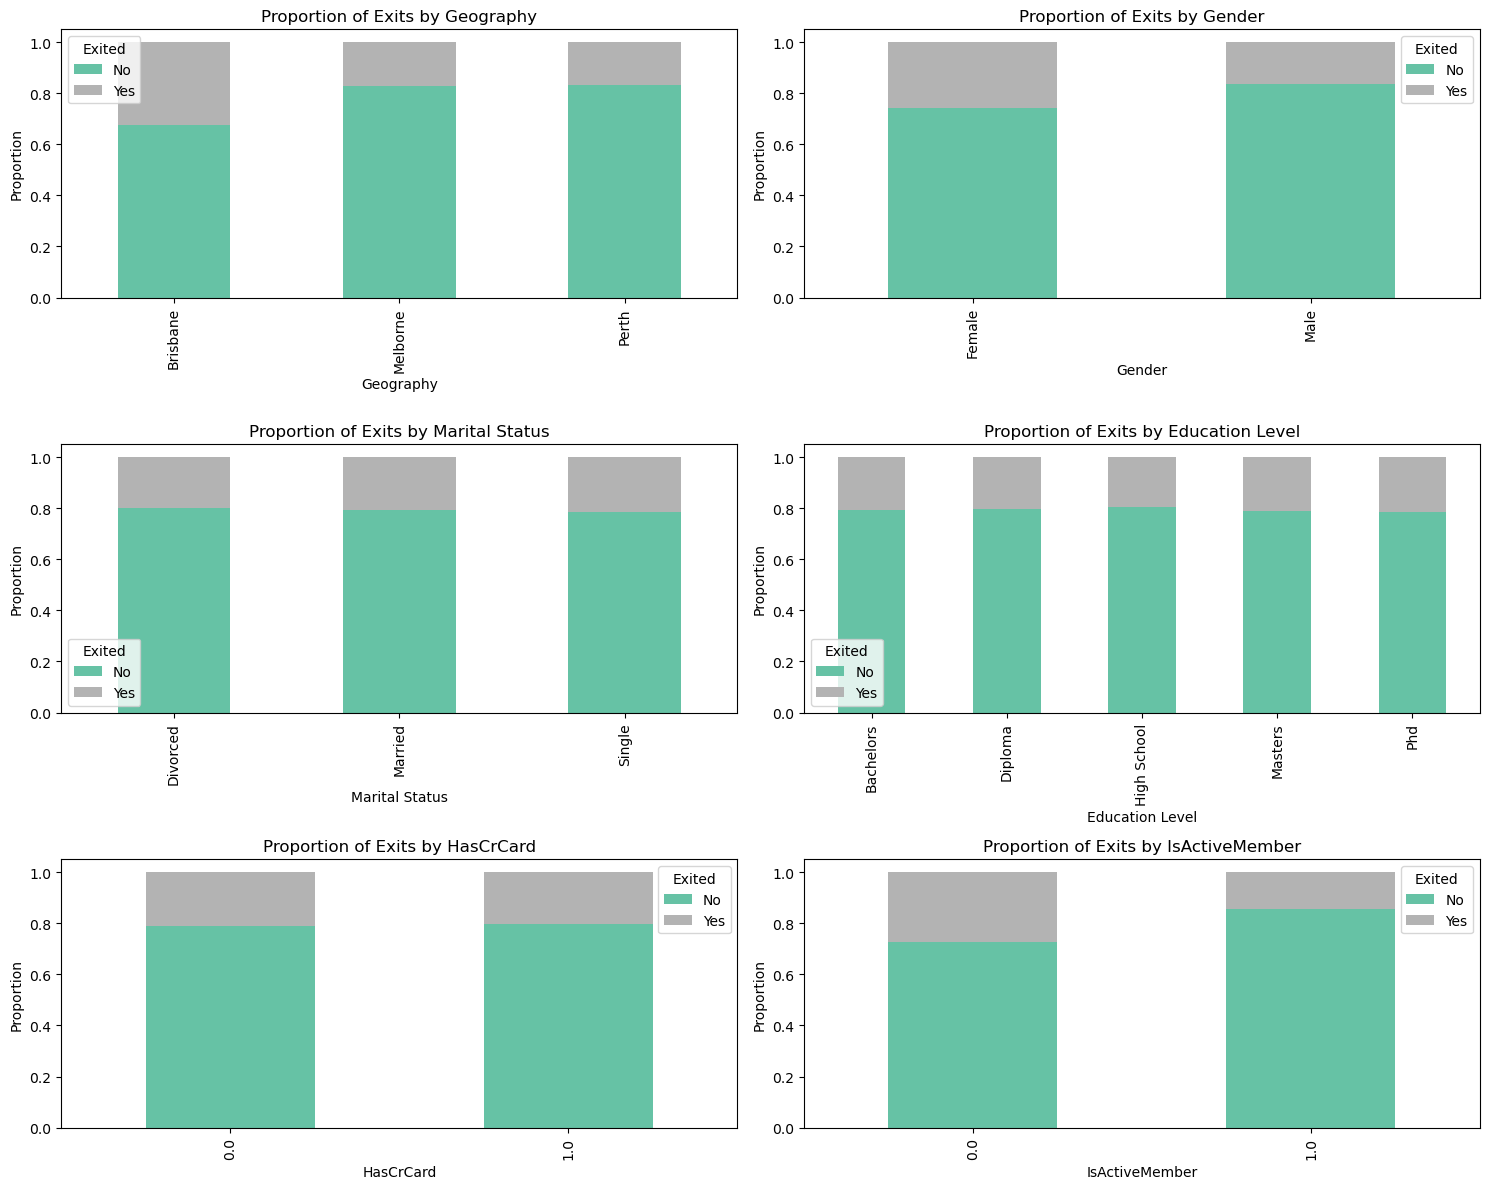

In [8]:
categorical_columns = ['Geography', 'Gender', 'Marital Status', 'Education Level', 'HasCrCard', 'IsActiveMember']
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'Income', 'NumOfProducts', 'EstimatedSalary']


# Set up the plotting grid for categorical columns
plt.figure(figsize=(15, 12))

# Plot proportions for categorical columns
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)
    
    # Calculate proportions within each category and plot
    total_counts = eda_df.groupby([col, 'Exited']).size().unstack()
    proportions = total_counts.div(total_counts.sum(axis=1), axis=0)
    proportions.plot(kind='bar', stacked=True, ax=plt.gca(), colormap="Set2")
    
    plt.title(f'Proportion of Exits by {col}')
    plt.xlabel(col)
    plt.ylabel('Proportion')
    plt.legend(title='Exited', labels=['No', 'Yes'])

# Improve layout
plt.tight_layout()
plt.show()


### 25% of customers from brisbane seems to exit compared to less than 20% from perth and melbourne
### 30% of customers who are not active member exit compared to 10% of customers who are active member

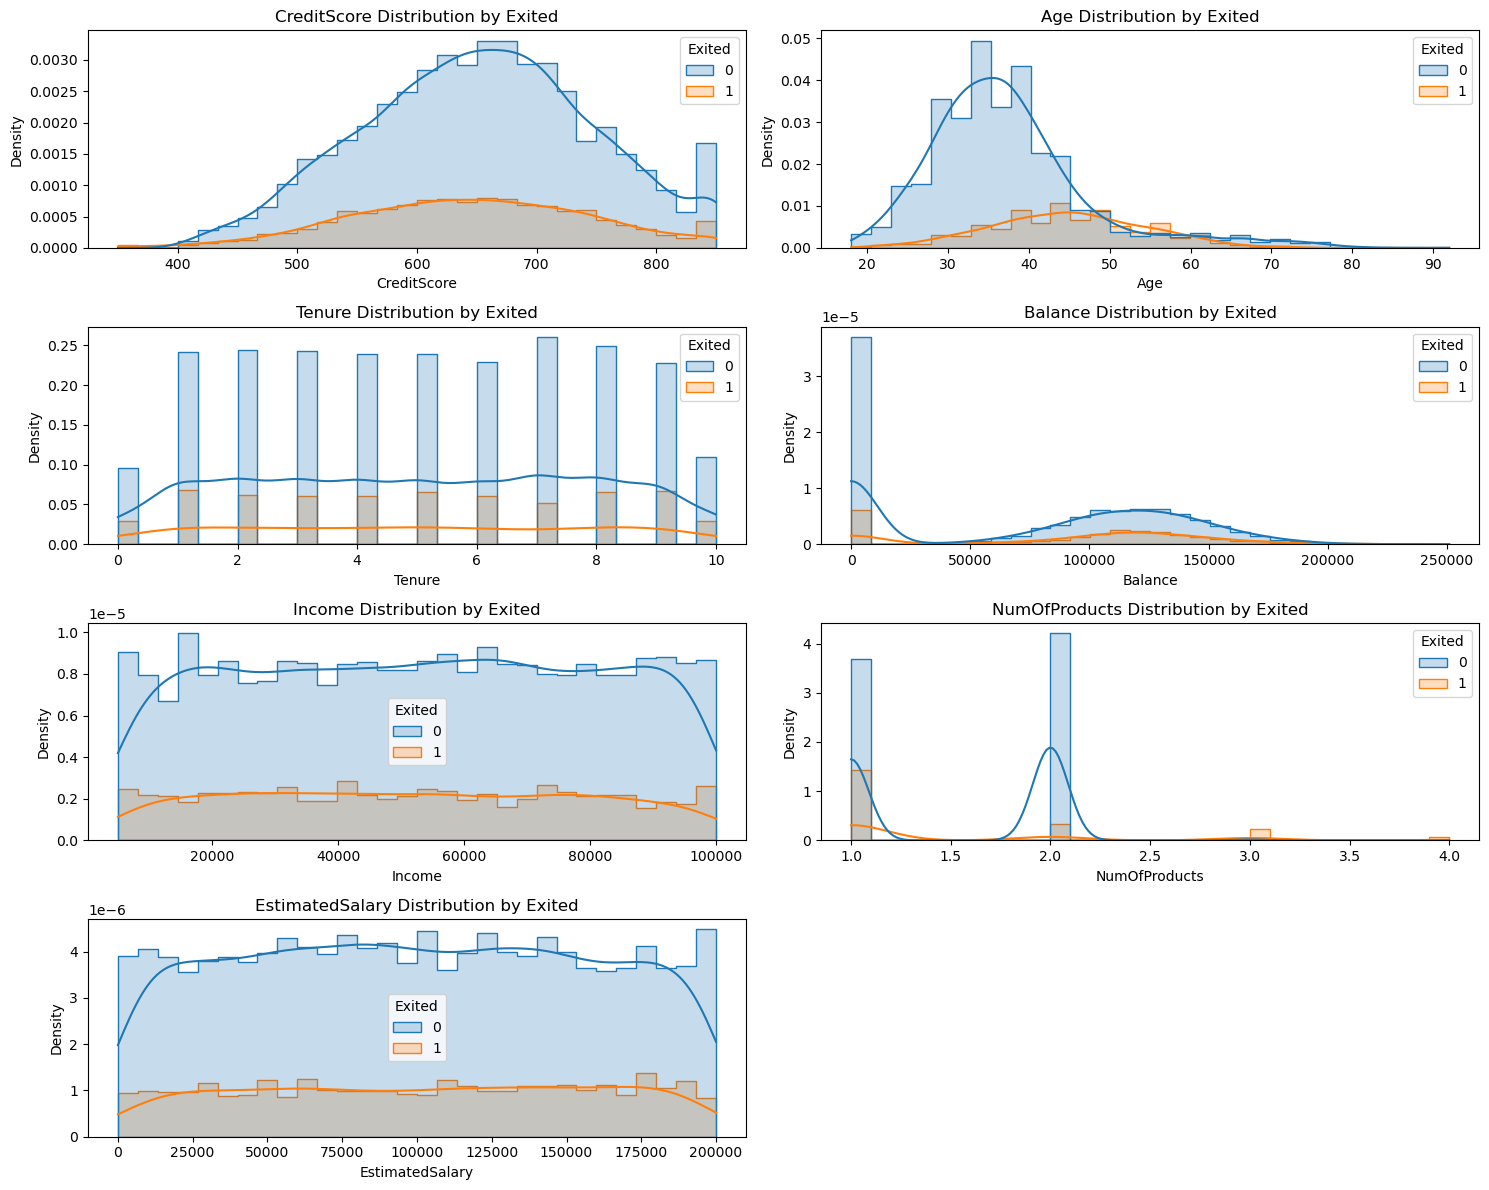

In [9]:
# Set up the plotting grid for numerical columns
plt.figure(figsize=(15, 12))

# Plot distributions for numerical columns
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 2, i)
    sns.histplot(data=eda_df, x=col, hue='Exited', kde=True, bins=30, element="step", stat="density")
    plt.title(f'{col} Distribution by Exited')
    plt.xlabel(col)
    plt.ylabel('Density')

# Improve layout
plt.tight_layout()
plt.show()


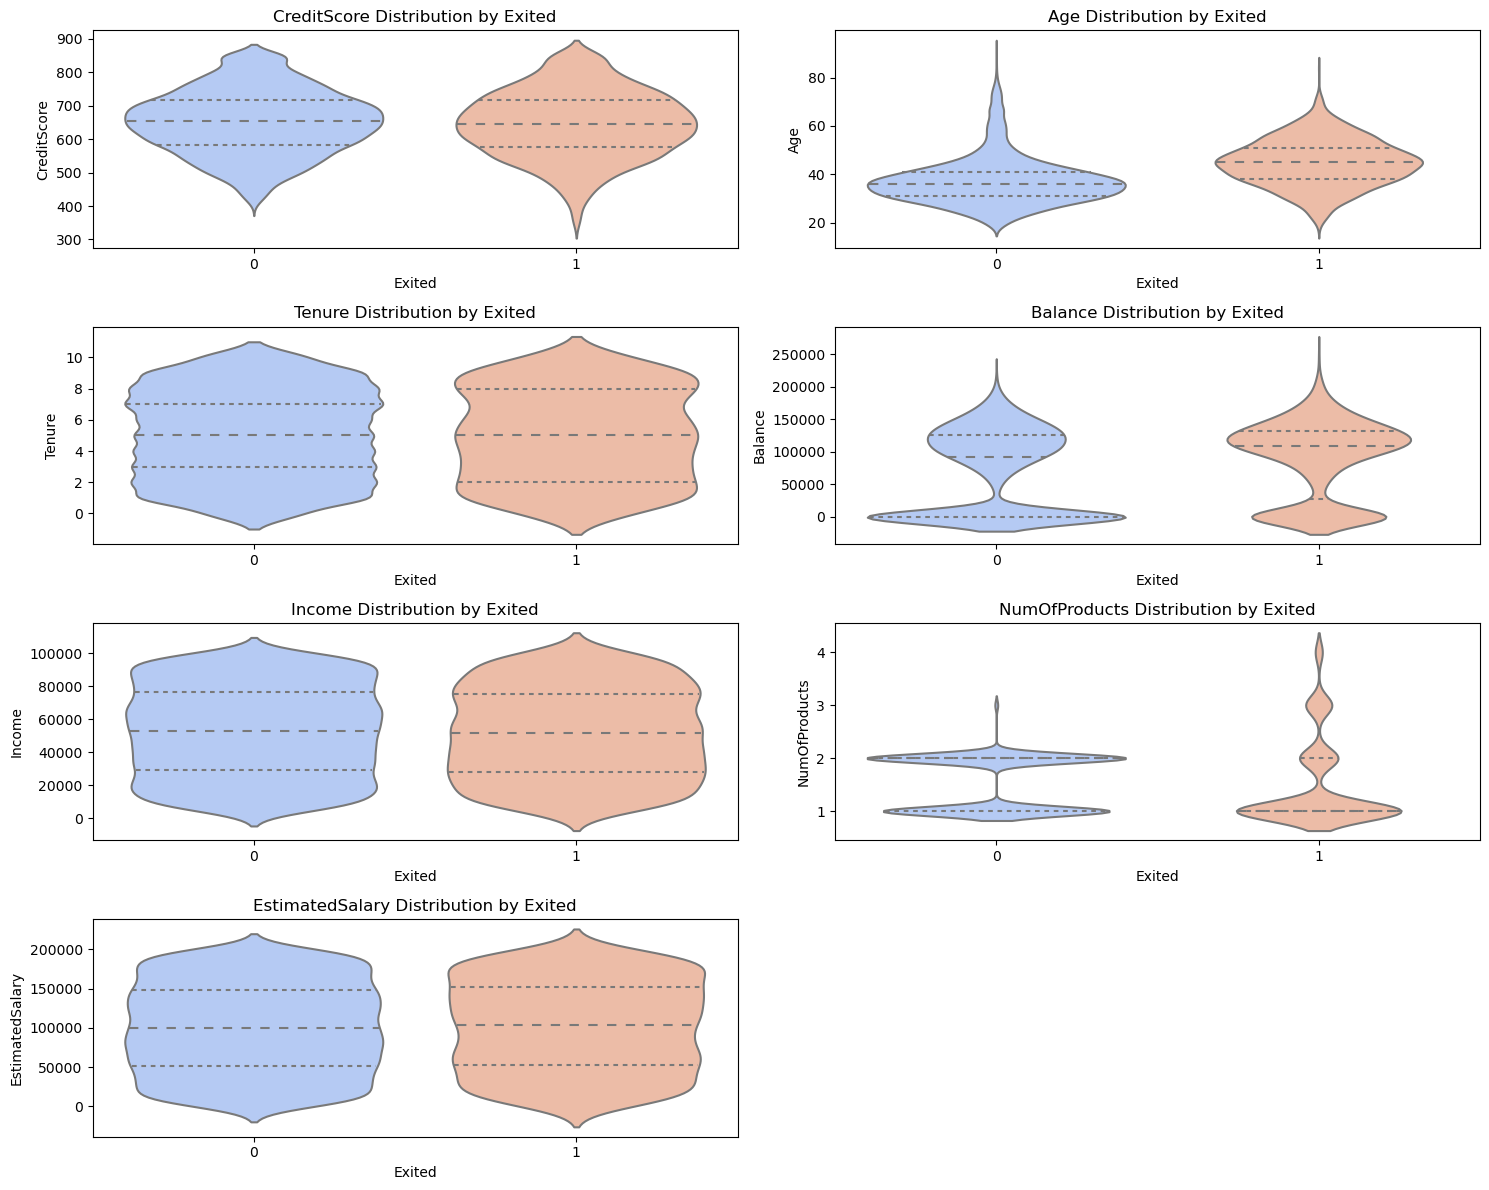

In [10]:
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'Income', 'NumOfProducts', 'EstimatedSalary']
# Set up the plotting grid for numerical columns
plt.figure(figsize=(15, 12))

# Plot violin plots for numerical columns
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 2, i)
    sns.violinplot(data=eda_df, x='Exited', y=col, palette="coolwarm", inner="quartile")
    plt.title(f'{col} Distribution by Exited')
    plt.xlabel('Exited')
    plt.ylabel(col)

# Improve layout
plt.tight_layout()
plt.show()


In [11]:
print('Average Credit score for customers who have exited :',np.mean(eda_df[eda_df.Exited == 1]['CreditScore']))
print('Average Credit score for customers who have not exited :',np.mean(eda_df[eda_df.Exited == 0]['CreditScore']))

Average Credit score for customers who have exited : 644.85125
Average Credit score for customers who have not exited : 651.5007337355291


In [12]:
print('Average age for customers who have exited :',np.mean(eda_df[eda_df.Exited == 1]['Age']))
print('Average age for customers who have exited :',np.mean(eda_df[eda_df.Exited == 0]['Age']))

Average age for customers who have exited : 44.87171464330413
Average age for customers who have exited : 37.38161968388464


People who have exited: 
### Credit score is lower 644 compared to 652 and Average age is higher 45 compared to 38

Identifying most important features from the dataset

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
eda_df = eda_df.dropna()
features_df = eda_df.drop(['CustomerId','Exited'],axis =1)
dummy_feat = pd.get_dummies(features_df,columns=['Geography', 'Gender', 'Marital Status', 'Education Level', 
                                                 'HasCrCard', 'IsActiveMember'])
features_df = pd.concat([features_df,dummy_feat],axis=1).drop(['Geography', 'Gender', 'Marital Status', 
                                                'Education Level', 'HasCrCard', 'IsActiveMember'],axis=1)
features_df.head()

,CreditScore,Age,Tenure,Balance,Income,NumOfProducts,EstimatedSalary,CreditScore,Age,Tenure,...,Marital Status_Single,Education Level_Bachelors,Education Level_Diploma,Education Level_High School,Education Level_Masters,Education Level_Phd,HasCrCard_0.0,HasCrCard_1.0,IsActiveMember_0.0,IsActiveMember_1.0
0,619.0,42.0,2,0.00,84256.33,1.0,101348.88,619.0,42.0,2,...,0,0,0,1,0,0,0,1,0,1
1,608.0,41.0,1,83807.86,18835.46,1.0,112542.58,608.0,41.0,1,...,0,0,1,0,0,0,1,0,0,1
2,502.0,42.0,8,159660.80,49099.61,3.0,113931.57,502.0,42.0,8,...,1,0,1,0,0,0,0,1,1,0
3,699.0,39.0,1,0.00,78133.84,2.0,93826.63,699.0,39.0,1,...,0,0,0,0,1,0,1,0,1,0
4,850.0,43.0,2,125510.82,79712.19,1.0,79084.10,850.0,43.0,2,...,1,1,0,0,0,0,0,1,0,1


In [15]:
features_model = RandomForestClassifier()

In [16]:
features_model.fit(features_df,eda_df.Exited)

RandomForestClassifier()

In [17]:
imp_features = features_model.feature_importances_
imp_features

array([0.05222939, 0.11585952, 0.03100198, 0.05696019, 0.05323972,
       0.0684934 , 0.05141329, 0.05142775, 0.10546625, 0.02944295,
       0.05517202, 0.05487864, 0.05770988, 0.05407205, 0.01789235,
       0.00729942, 0.0082679 , 0.0074923 , 0.00947959, 0.00797082,
       0.00818111, 0.00787313, 0.00904487, 0.00785432, 0.00542834,
       0.00759238, 0.00049364, 0.0073679 , 0.00742882, 0.01891835,
       0.02404774])

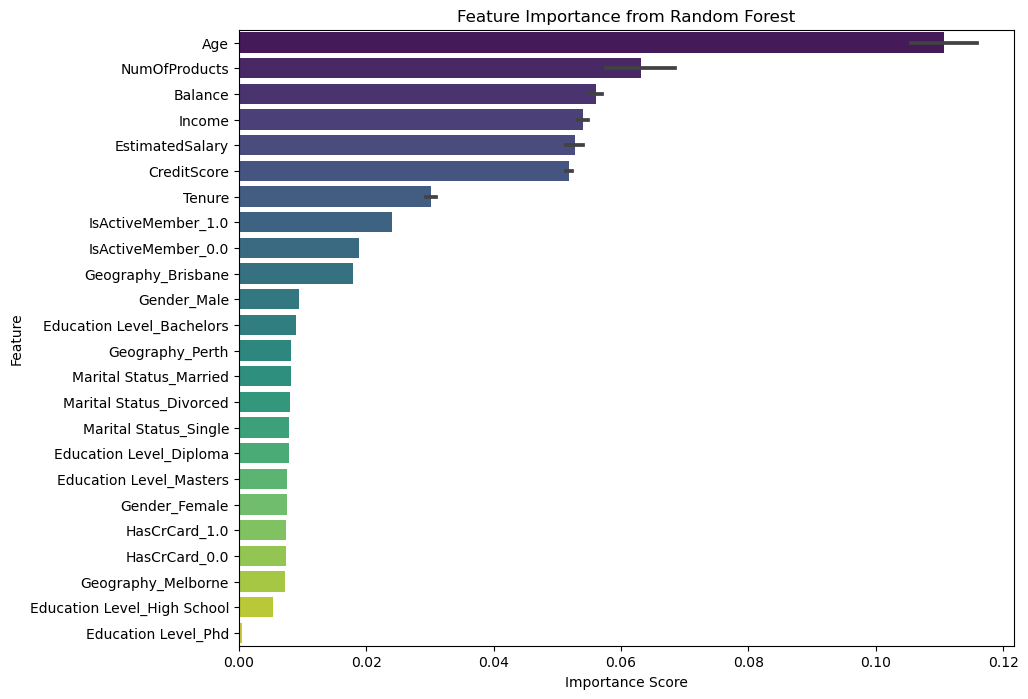

In [18]:
# Combine feature names with their importance scores
feature_importances = pd.DataFrame({
    'Feature': features_df.columns,
    'Importance': imp_features
})

# Sort features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette="viridis")
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


### Top Important features

* Age
* NumOfProducts
* Balance
* Income
* EstimatedSalary
* CreditScore

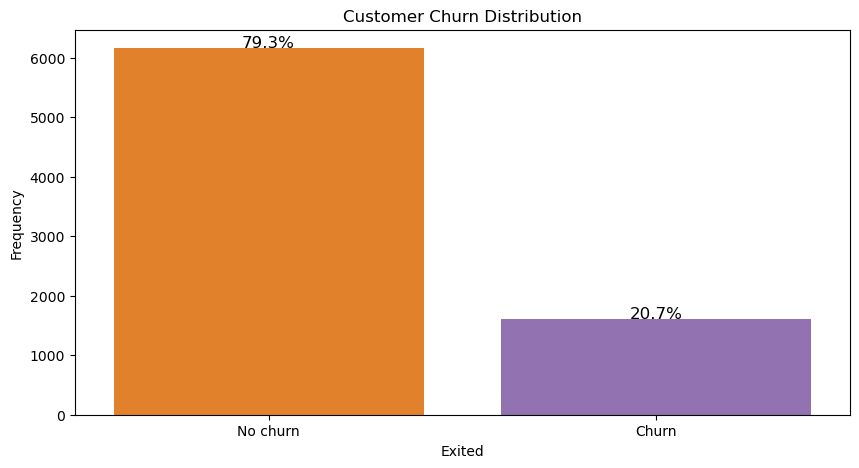

In [19]:
churn_count = churn_df['Exited'].value_counts()

fig, ax = plt.subplots(figsize=(10,5))
color_palette = sns.color_palette()
sns.barplot(x=churn_count.index, 
            y=churn_count.values,
            palette= [color_palette[1], color_palette[4]]
            ).set(
                xticks = range(2),
                xticklabels = ["No churn", "Churn"],
                xlabel = 'Exited',
                ylabel = 'Frequency',
                title = 'Customer Churn Distribution'
             )
total_count = sum(churn_count.values)
for i, count in enumerate(churn_count.values):
    percentage = round(count / total_count * 100, 1)
    ax.text(i, count - 45, f'{percentage}%', ha='center', va='bottom', size=12)

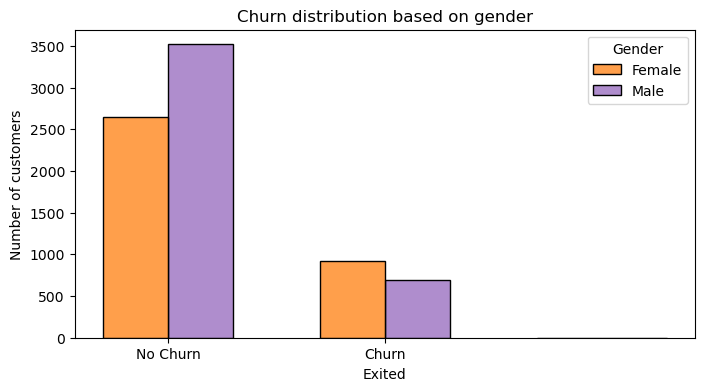

In [20]:
fig, ax = plt.subplots(figsize=(8,4))
sns.histplot(data=churn_df, x='Exited', 
             bins=np.arange(4) - 0.5,
             hue='Gender', 
             multiple='dodge',
             shrink=.6,
             legend= True,
             palette=[color_palette[1], color_palette[4]]
             ).set(
                xticks = range(2),
                xticklabels = ["No Churn", "Churn"],
                ylabel = 'Number of customers',
                title = 'Churn distribution based on gender'
             ); 

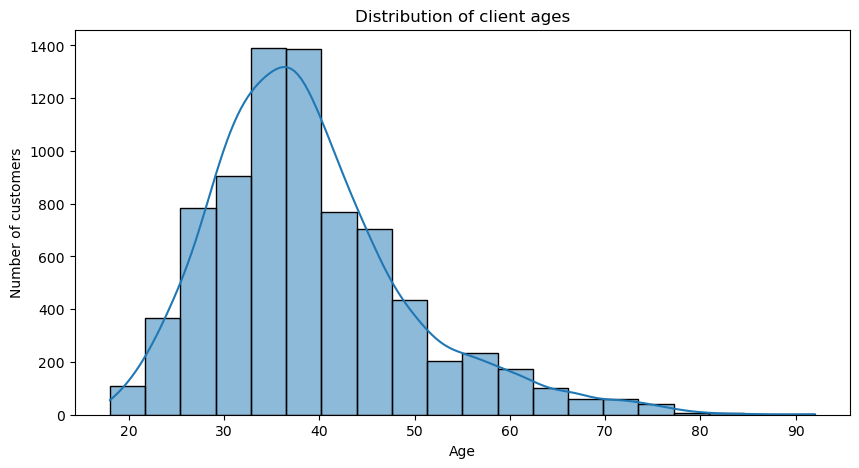

In [21]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=churn_df, 
             x ='Age',
             bins=20,
             ax=ax, 
             kde=True
             ).set(
                xlabel = 'Age',
                ylabel = 'Number of customers',
                title = 'Distribution of client ages'
    );

In [22]:
cont_cols = [i for i in churn_df.columns if churn_df[i].dtype in ['float64', 'int64']]
cont_cols

['RowNumber',
 'CustomerId',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'Income',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

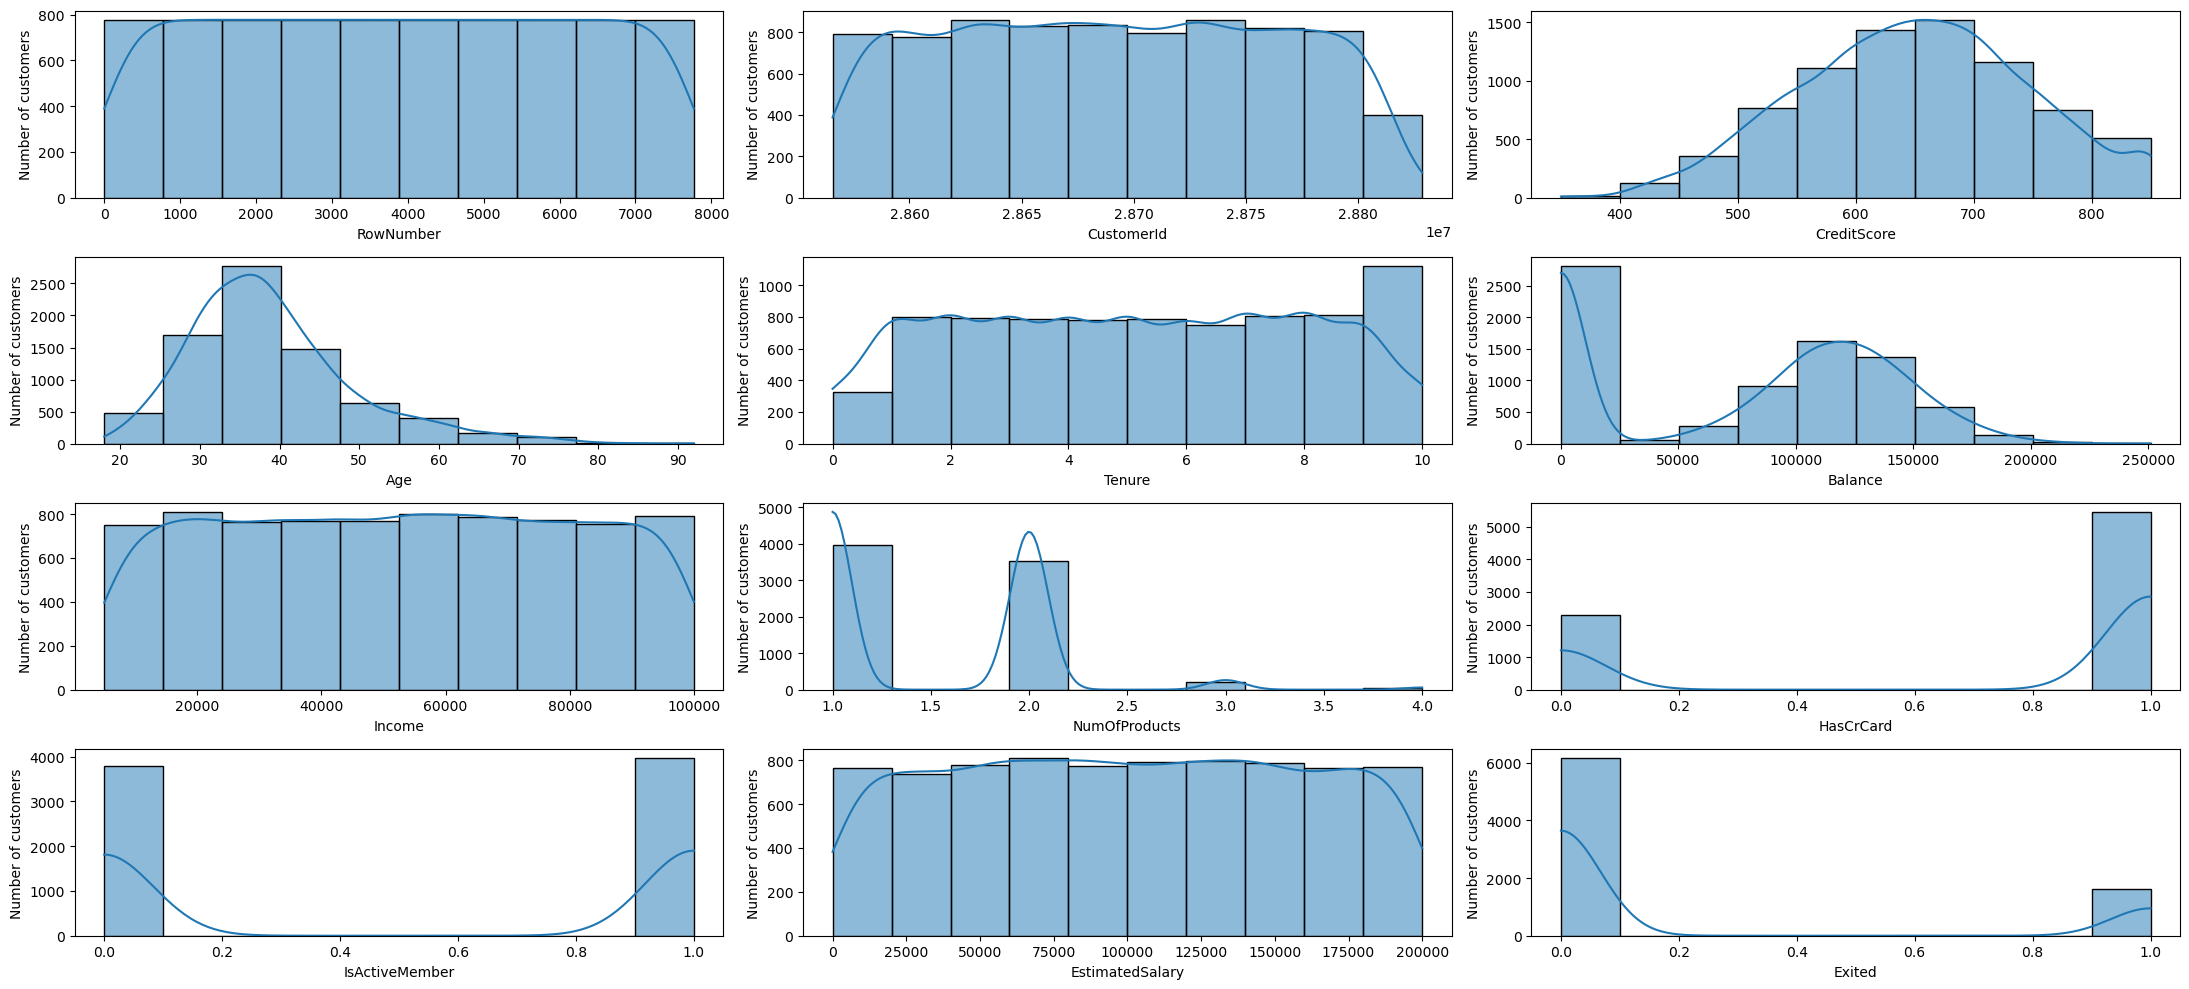

In [23]:
#Checking for Outliers
fig, axes = plt.subplots(ncols=3, nrows=4, figsize=(22,10))
for i, col in enumerate(cont_cols):
     ax = axes[i//3][i%3]
     sns.histplot(churn_df[col], bins=10 ,kde=True, ax=ax)
     ax.set_xlabel(col)
     ax.set_ylabel("Number of customers")
fig.set_tight_layout(True);


In [24]:
#Create an 80:20 partition and find positives in test data
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [25]:
X = churn_df.drop('Exited', axis=1)
y = churn_df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 6215
Testing set size: 1554


In [26]:
#pip install -U imbalanced-learn

In [27]:
# Varaibles that have missing values or NA's are 'CreditScore ','Age','NumOfProducts', 'IsActiveMember' -
# Impute Missing values

In [28]:
# Split Data into Numeric and Object variables
numcols=churn_df.select_dtypes(include=np.number) # np.number selects both int & float
objcols=churn_df.select_dtypes(include=['object'])

In [29]:
numcols.columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'Income', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [30]:
# Moving Variables from numcols to objcols
objcols['Tenure']=numcols['Tenure']

In [31]:
# Drop above moved variables from numcols
numcols=numcols.drop(['Tenure'],axis=1)

In [32]:
# All missing values are in numeric variables. Any variable that has count less than 9949 has NA's
numcols.describe()

,RowNumber,CustomerId,CreditScore,Age,Balance,Income,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,7769.000000,7.769000e+03,7733.000000,7735.000000,7769.000000,7769.000000,7756.000000,7764.000000,7759.000000,7769.000000,7769.000000
mean,3885.000000,2.869094e+07,650.124919,38.929024,76683.015487,52541.631657,1.528107,0.702988,0.511922,100352.793665,0.206719
std,2242.861454,7.163114e+04,96.798017,10.486769,62436.298960,27421.021672,0.584219,0.456971,0.499890,57424.110659,0.404978
min,1.000000,2.856570e+07,350.000000,18.000000,0.000000,5000.960000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1943.000000,2.862895e+07,583.000000,32.000000,0.000000,29022.730000,1.000000,0.000000,0.000000,51637.670000,0.000000
50%,3885.000000,2.869067e+07,652.000000,37.000000,97612.120000,52737.870000,1.000000,1.000000,1.000000,100601.730000,0.000000
75%,5827.000000,2.875238e+07,717.000000,44.000000,127785.170000,76135.360000,2.000000,1.000000,1.000000,149331.010000,0.000000
max,7769.000000,2.882869e+07,850.000000,92.000000,250898.090000,99993.410000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [33]:
# Mean Imputation
for col in numcols.columns:
    numcols[col]=numcols[col].fillna(numcols[col].mean())

In [34]:
objcols.columns

Index(['Geography', 'Gender', 'Marital Status', 'Education Level', 'Tenure'], dtype='object')

In [35]:
# Data preprocessing on Object Cols or Non Numeric Cols - Dummy Variable Encoding is converting object/string
# data into numeric or boolean format. Dummy variable encoding must be done on object cols as algorithms

# Dummy variable encoding in python - pd.get_dummies() . pd.get_dummies() creates new columns equivalent to
# number of levels/classes and uses boolean encoding False/True.

objcols_dummy=pd.get_dummies(objcols,columns=['Geography', 'Gender', 'Marital Status', 'Education Level'])
# except 'Exited' i.e. dependent variable rest of all dummy encoded. dependent variable must not be dummy
# encoded

In [36]:
objcols_dummy.head(3)

,Tenure,Geography_Brisbane,Geography_Melborne,Geography_Perth,Gender_Female,Gender_Male,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Education Level_Bachelors,Education Level_Diploma,Education Level_High School,Education Level_Masters,Education Level_Phd
0,2,0,0,1,1,0,1,0,0,0,0,1,0,0
1,1,0,1,0,1,0,0,1,0,0,1,0,0,0
2,8,0,0,1,1,0,0,0,1,0,1,0,0,0


In [37]:
# Column Concatenation(side by side) pasting of preprocessed dataframes
churn_df_final=pd.concat([numcols,objcols_dummy],axis=1)

In [38]:
# Split Data into dependent variable(y) and Independent Variables(X's)
y=churn_df_final.Exited
X=churn_df_final.drop(['CustomerId','Exited'],axis=1)

<Axes: >

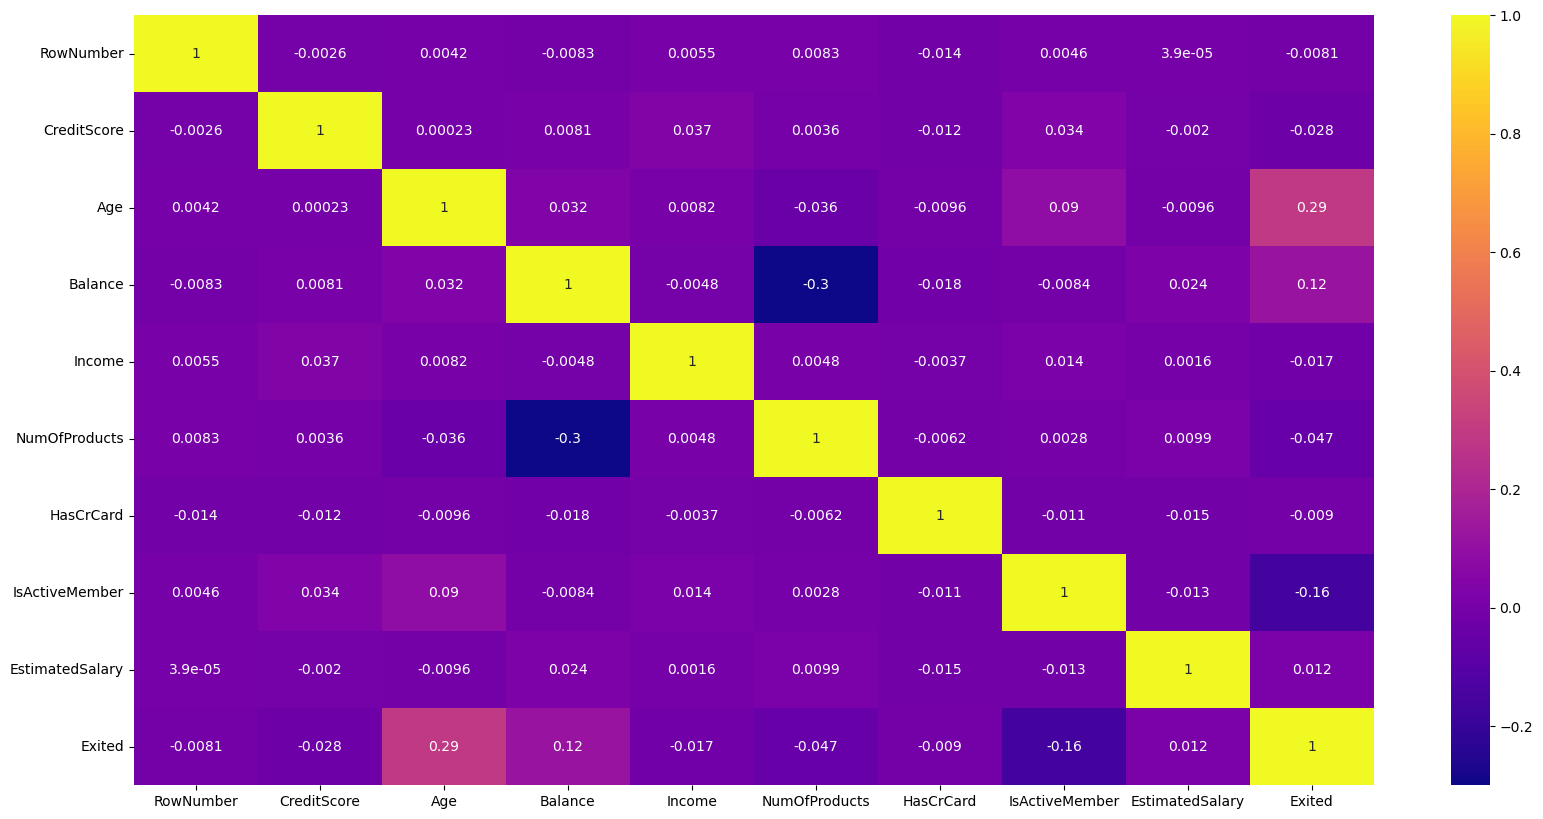

In [39]:
# 2 Assumptions to check - dependent variable is binary and No Multicollinearity
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(numcols.drop('CustomerId',axis=1).corr(),annot=True,cmap="plasma") # No Multicolliearity

In [40]:
y.value_counts() # Exactly 2 levels or binary dependent variable

0    6163
1    1606
Name: Exited, dtype: int64

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
logitmodel=LogisticRegression(max_iter=2000).fit(X,y) 

In [43]:
logitmodel.score(X,y) # Accuracy - 0.7880 calculated from Confusion Matrix

0.7849144033981207

In [44]:
logit_pred=logitmodel.predict(X)

In [45]:
pd.crosstab(y,logit_pred)

# Exited 0 means Customer Did Not Leave(positive) - 0 is Positive
# Exited 1 means Customer Left Company (Negative) - 1 is Negative

# True Positive - 5990 , False Negative - 108, False Positive - 1498 & True Negative - 108

# Objective is to Study is Exited 1 which is Negative, Why Customers are Leaving?

col_0,0,1
Exited,,
0,5990,173
1,1498,108


In [46]:
(7718+122)/(7718+203+1906+122)

0.7880188963714946

In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
cross_val_score(logitmodel,X,y)

array([0.77927928, 0.78507079, 0.78314028, 0.78442728, 0.79137154])

In [49]:
np.mean([0.80552764, 0.78442211, 0.78944724, 0.78994975, 0.7918552 ])
# Cross Validation is repeated testing of model with samples of train data to check robustness and relaibility
# of model. Average Cross Validated Accuracy is Close to Train Model Accuracy

0.792240388

In [50]:
from sklearn.metrics import classification_report

In [51]:
print(classification_report(y,logit_pred))

# Prediction of Minority Class(1) is worst as there are few observations for algorithm to analyze.
# Imbalance Data Problem is a critical problem in Classification like skewness is problem in Regression
# Imbalance Data Majority Class (>70%) and Minority Class(<30%)
# Imbalance Data effects prediction of minority class

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      6163
           1       0.38      0.07      0.11      1606

    accuracy                           0.78      7769
   macro avg       0.59      0.52      0.50      7769
weighted avg       0.71      0.78      0.72      7769



<Axes: ylabel='Exited'>

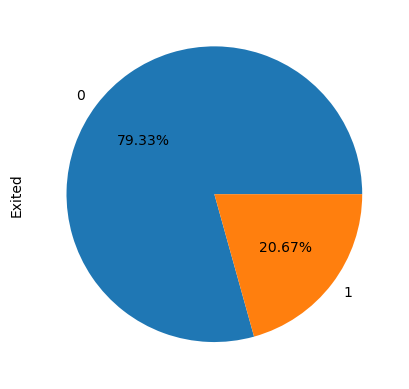

In [52]:
y.value_counts().plot(kind="pie",autopct="%.2f%%") # Majority Class is 0 (79.62%) & Minority Class is 1 (20.38%)

In [53]:
# Imbalance Data is dealt with Sampling Techniques like OverSampling and Undersampling.
# 1) Undersampling is random deletion of records or observations from majority class and make it equal to
# minority class. Used when data size is large typically millions of rows of data.

# 2) Oversampling  is random copying or duplicating records or observations from minority class to make
# it equal to majority class. Used when data size is small like thousands of observations or rows.
# Most used is Oversampling and most popular oversampling algorithm is Synthetic Minority Oversampling 
# Technique(SMOTE) 
# Data size is small, hence Oversampling techniques must be used. SMOTE is most popular algorithm
# Synthetic Minority Oversampling Technique(SMOTE) creates synthetic or artificial data in the minority
# class in such a manner that newly created data points fall within existing data range and does not create
# outliers.
# SMOTE uses nearest neighbors and random number for weight generation as part of process
# Nearest Neighbors identify closest observations using Euclidean distance, default 5 neighbors

In [54]:
from imblearn.over_sampling import SMOTENC

In [55]:
X.columns

Index(['RowNumber', 'CreditScore', 'Age', 'Balance', 'Income', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Tenure',
       'Geography_Brisbane', 'Geography_Melborne', 'Geography_Perth',
       'Gender_Female', 'Gender_Male', 'Marital Status_Divorced',
       'Marital Status_Married', 'Marital Status_Single',
       'Education Level_Bachelors', 'Education Level_Diploma',
       'Education Level_High School', 'Education Level_Masters',
       'Education Level_Phd'],
      dtype='object')

In [56]:
smote=SMOTENC(categorical_features=['Geography_Brisbane', 'Geography_Melborne', 'Geography_Perth',
       'Gender_Female', 'Gender_Male', 'Marital Status_Divorced',
       'Marital Status_Married', 'Marital Status_Single',
       'Education Level_Bachelors', 'Education Level_Diploma',
       'Education Level_High School', 'Education Level_Masters',
       'Education Level_Phd'])

In [57]:
X_smote,y_smote=smote.fit_resample(X,y)

In [58]:
print(y.value_counts())
print(pd.DataFrame(y_smote).value_counts())

0    6163
1    1606
Name: Exited, dtype: int64
Exited
0         6163
1         6163
dtype: int64


In [59]:
logitmodel_smote=LogisticRegression(max_iter=5000).fit(X_smote,y_smote)

In [60]:
logitmodel_smote.score(X_smote,y_smote)

0.678484504299854

In [61]:
logit_smote_pred=logitmodel_smote.predict(X_smote)

In [62]:
pd.crosstab(y_smote,logit_smote_pred)

col_0,0,1
Exited,,
0,4103,2060
1,1903,4260


In [63]:
print(classification_report(y_smote,logit_smote_pred))

              precision    recall  f1-score   support

           0       0.68      0.67      0.67      6163
           1       0.67      0.69      0.68      6163

    accuracy                           0.68     12326
   macro avg       0.68      0.68      0.68     12326
weighted avg       0.68      0.68      0.68     12326



In [64]:
churn_df_final.to_csv("Churn_Modelling_final.csv")

In [65]:
from sklearn.metrics import RocCurveDisplay

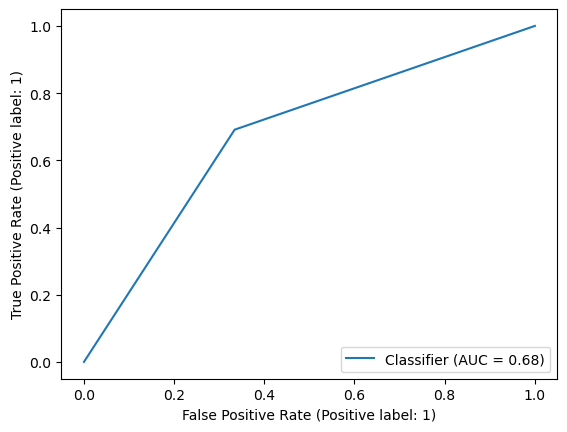

In [66]:
RocCurveDisplay.from_predictions(y_smote,logit_smote_pred)

# Area Under Receivers Operating Curve (AUROC) must be above 0.50 close to 1. Typically >0.70 to 1.

In [67]:
#pip install xgboost

In [68]:
 #MODELS BUILDING AND PERFORMANCE EVALUATION

# Import required libraries for performance metrics
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate
import pandas as pd  # Pandas import

# Define dictionary with performance metrics
scoring = {'accuracy': make_scorer(accuracy_score), 
           'precision': make_scorer(precision_score, average='macro'),  # Added 'average'
           'recall': make_scorer(recall_score, average='macro'),        # Added 'average'
           'f1_score': make_scorer(f1_score, average='macro')}          # Added 'average'

# Import required libraries for machine learning classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Instantiate the machine learning classifiers
log_model = LogisticRegression(max_iter=10000)
svc_model = LinearSVC(dual=False)
dtr_model = DecisionTreeClassifier()
rfc_model = RandomForestClassifier()
gnb_model = GaussianNB()
knn_model = KNeighborsClassifier()
ada_model = AdaBoostClassifier()
grb_model = GradientBoostingClassifier()
xgb_model = XGBClassifier()


In [69]:
# Define the models evaluation function
def models_evaluation(X, y, folds):
    
    '''
    X : data set features
    y : data set target
    folds : number of cross-validation folds
    
    '''
    
    # Perform cross-validation to each machine learning classifier
    log = cross_validate(log_model, X, y, cv=folds, scoring=scoring)
    svc = cross_validate(svc_model, X, y, cv=folds, scoring=scoring)
    dtr = cross_validate(dtr_model, X, y, cv=folds, scoring=scoring)
    rfc = cross_validate(rfc_model, X, y, cv=folds, scoring=scoring)
    gnb = cross_validate(gnb_model, X, y, cv=folds, scoring=scoring)
    knn = cross_validate(knn_model, X, y, cv=folds, scoring=scoring)
    ada = cross_validate(ada_model, X, y, cv=folds, scoring=scoring)
    grb = cross_validate(grb_model, X, y, cv=folds, scoring=scoring)
    xgb = cross_validate(xgb_model, X, y, cv=folds, scoring=scoring)
    
    # Create a data frame with the models performance measures scores
    models_scores_table = pd.DataFrame({
        'Logistic Regression': [log['test_accuracy'].mean(),
                                log['test_precision'].mean(),
                                log['test_recall'].mean(),
                                log['test_f1_score'].mean()],
        'Support Vector Classifier': [svc['test_accuracy'].mean(),
                                      svc['test_precision'].mean(),
                                      svc['test_recall'].mean(),
                                      svc['test_f1_score'].mean()],
        'Decision Tree': [dtr['test_accuracy'].mean(),
                          dtr['test_precision'].mean(),
                          dtr['test_recall'].mean(),
                          dtr['test_f1_score'].mean()],
        'Random Forest': [rfc['test_accuracy'].mean(),
                          rfc['test_precision'].mean(),
                          rfc['test_recall'].mean(),
                          rfc['test_f1_score'].mean()],
        'Gaussian Naive Bayes': [gnb['test_accuracy'].mean(),
                                 gnb['test_precision'].mean(),
                                 gnb['test_recall'].mean(),
                                 gnb['test_f1_score'].mean()],
        'KNeighbors': [knn['test_accuracy'].mean(),
                       knn['test_precision'].mean(),
                       knn['test_recall'].mean(),
                       knn['test_f1_score'].mean()],
        'AdaBoost': [ada['test_accuracy'].mean(),
                     ada['test_precision'].mean(),
                     ada['test_recall'].mean(),
                     ada['test_f1_score'].mean()],
        'GradientBoosting': [grb['test_accuracy'].mean(),
                             grb['test_precision'].mean(),
                             grb['test_recall'].mean(),
                             grb['test_f1_score'].mean()],
        'XGB': [xgb['test_accuracy'].mean(),
                xgb['test_precision'].mean(),
                xgb['test_recall'].mean(),
                xgb['test_f1_score'].mean()]},
        index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    
    
    models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
    

    return models_scores_table

In [70]:
# Run models_evaluation function
models_evaluation(X_smote,y_smote, 9)

/Users/anjurani/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/anjurani/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/Users/anjurani/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anjurani/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anjurani/anaconda3/lib/python3.11/site-packages/sklearn/utils/_response.py", line 85, in _get_response_values
    y_pred = prediction_method(X)
           

,Logistic Regression,Support Vector Classifier,Decision Tree,Random Forest,Gaussian Naive Bayes,KNeighbors,AdaBoost,GradientBoosting,XGB,Best Score
Accuracy,0.643690,0.671674,0.739749,0.823545,0.679058,NaN,0.663086,0.714355,0.543582,Random Forest
Precision,0.645786,0.673742,0.756210,0.847119,0.684339,NaN,0.647451,0.729829,0.639013,Random Forest
Recall,0.643697,0.671683,0.739780,0.823579,0.679064,NaN,0.663125,0.714387,0.543593,Random Forest
F1 Score,0.642287,0.670589,0.728264,0.805178,0.676797,NaN,0.634261,0.694471,0.487695,Random Forest


In [71]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the RandomForestClassifier
final_rfc_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
final_rfc_model.fit(X_train, y_train)

# Make predictions
y_pred = final_rfc_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.858000858000858

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      1827
           1       0.83      0.43      0.57       504

    accuracy                           0.86      2331
   macro avg       0.85      0.70      0.74      2331
weighted avg       0.85      0.86      0.84      2331


Confusion Matrix:
 [[1783   44]
 [ 287  217]]
